# 🇯🇵 Japan Population Analysis
### Python / Pandas / NumPy / Machine Learning

## Data Loading

In [60]:
import pandas as pd
df = pd.read_csv("data/japan_population.csv",skiprows=1)
df.head()
df.columns


Index(['date', 'age', 'gender_category', 'total_population', 'male_population',
       'female_population', 'sex_ratio', 'total_population_japanese',
       'male_population_japanese', 'female_population_japanese',
       'sex_ratio_japanese'],
      dtype='object')

## Data Cleaning

In [61]:
# Remove summary rows (SUM total rows)
df = df[df["age"] != "SUM"]

# Convert age column to numeric
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# Remove rows where age is missing
df = df.dropna(subset=["age"])

# Convert population columns to numeric (remove commas)
for col in ["total_population", "male_population", "female_population"]:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()


,date,age,gender_category,total_population,male_population,female_population,sex_ratio,total_population_japanese,male_population_japanese,female_population_japanese,sex_ratio_japanese
1,2020年10月1日,0.0,NaN,837,428,409,NaN,821,420,401,NaN
2,2020年10月1日,1.0,NaN,872,446,426,NaN,855,437,417,NaN
3,2020年10月1日,2.0,NaN,915,468,447,NaN,899,460,439,NaN
4,2020年10月1日,3.0,NaN,939,480,459,NaN,922,472,451,NaN
5,2020年10月1日,4.0,NaN,979,502,477,NaN,962,493,469,NaN


## Exploratory Data Analysis

In [62]:
# 按年龄统计人口
age_population = df.groupby("age")["total_population"].sum()

age_population.head()


age
0.0    3938
1.0    4090
2.0    4246
3.0    4388
4.0    4539
Name: total_population, dtype: int64

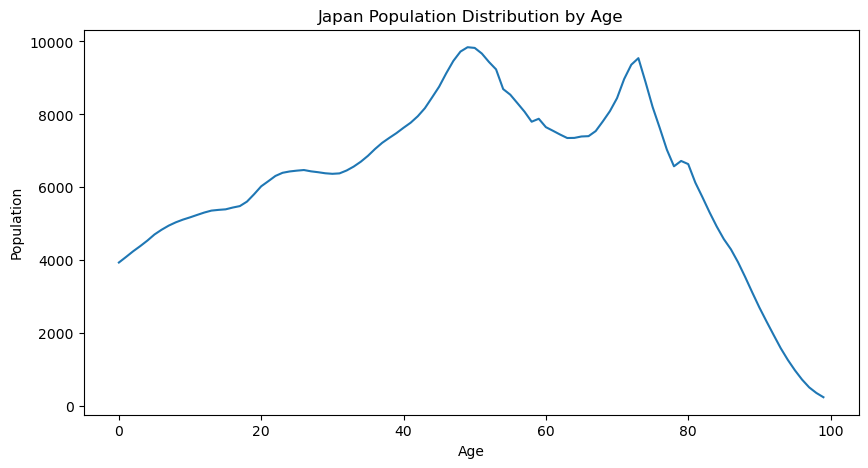

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(age_population.index, age_population.values)

plt.title("Japan Population Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Population")

plt.show()


In [64]:
male = df.groupby("age")["male_population"].sum()
female = df.groupby("age")["female_population"].sum()

male.head()


age
0.0    2017
1.0    2094
2.0    2173
3.0    2245
4.0    2323
Name: male_population, dtype: int64

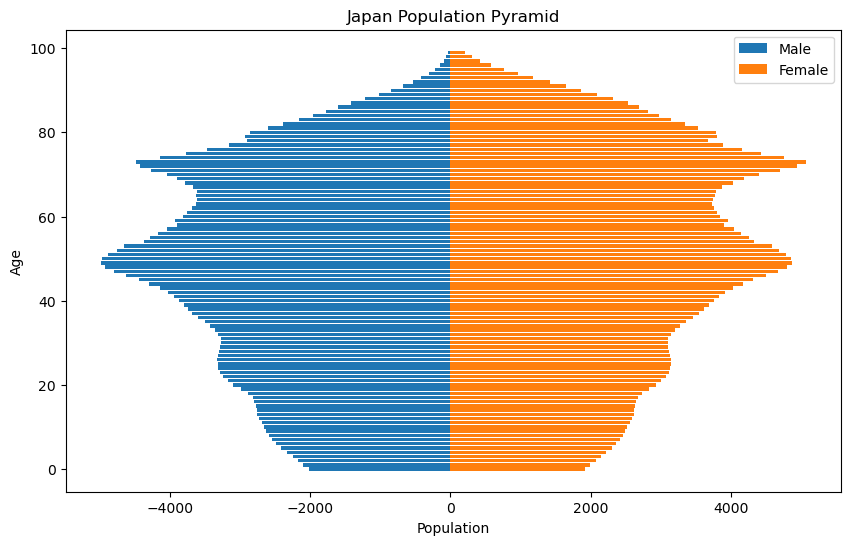

In [65]:
plt.figure(figsize=(10,6))

# 男性画左边（负数）
plt.barh(male.index, -male.values, label="Male")

# 女性画右边
plt.barh(female.index, female.values, label="Female")

plt.xlabel("Population")
plt.ylabel("Age")
plt.title("Japan Population Pyramid")
plt.legend()

plt.show()


In [66]:
# 65岁以上人口
aging_population = df[df["age"] >= 65]["total_population"].sum()

aging_population


np.int64(180517)

In [67]:
total_population = df["total_population"].sum()

total_population


np.int64(624328)

## Demographic Analysis

In [68]:
aging_rate = aging_population / total_population

print("Japan Aging Rate:", aging_rate)
print("Japan Aging Rate (%):", aging_rate * 100)


Japan Aging Rate: 0.2891380812649761
Japan Aging Rate (%): 28.91380812649761


In [69]:
pop_0_14 = df[(df["age"] >= 0) & (df["age"] <= 14)]["total_population"].sum()
pop_15_64 = df[(df["age"] >= 15) & (df["age"] <= 64)]["total_population"].sum()
pop_65_plus = df[df["age"] >=65]["total_population"].sum()

total = df["total_population"].sum()

shares = {
    "0-14": pop_0_14 / total,
    "15-64": pop_15_64 / total,
    "65+": pop_65_plus / total
}

shares



{'0-14': np.float64(0.1158445560666829),
 '15-64': np.float64(0.595017362668341),
 '65+': np.float64(0.2891380812649761)}

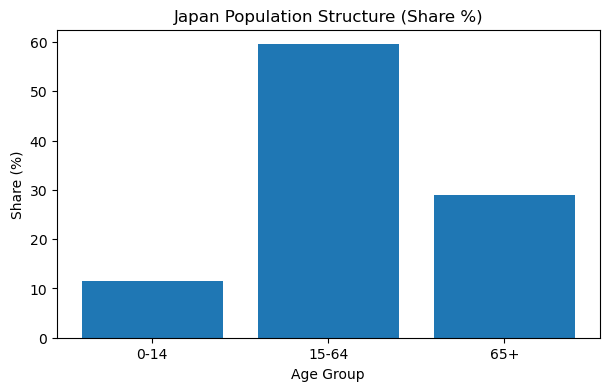

In [70]:
import matplotlib.pyplot as plt

labels = list(shares.keys())
values = [v * 100 for v in shares.values()]  # 转成百分比

plt.figure(figsize=(7,4))
plt.bar(labels, values)
plt.title("Japan Population Structure (Share %)")
plt.xlabel("Age Group")
plt.ylabel("Share (%)")
plt.show()


In [71]:
# 总抚养比
dependency_total = (pop_0_14 + pop_65_plus) / pop_15_64

# 老年抚养比
dependency_old = pop_65_plus / pop_15_64

# 少年抚养比
dependency_young = pop_0_14 / pop_15_64

print("Total dependency ratio:", dependency_total)
print("Old-age dependency ratio:", dependency_old)
print("Young dependency ratio:", dependency_young)

print("Total dependency ratio (%):", dependency_total * 100)
print("Old-age dependency ratio (%):", dependency_old * 100)
print("Young dependency ratio (%):", dependency_young * 100)


Total dependency ratio: 0.6806232267164846
Old-age dependency ratio: 0.4859321751021573
Young dependency ratio: 0.19469105161432732
Total dependency ratio (%): 68.06232267164846
Old-age dependency ratio (%): 48.59321751021573
Young dependency ratio (%): 19.469105161432733


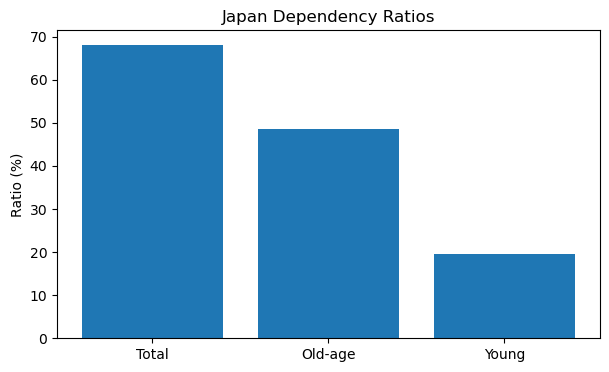

In [72]:
import matplotlib.pyplot as plt

labels = ["Total", "Old-age", "Young"]
values = [
    dependency_total * 100,
    dependency_old * 100,
    dependency_young * 100
]

plt.figure(figsize=(7,4))
plt.bar(labels, values)

plt.title("Japan Dependency Ratios")
plt.ylabel("Ratio (%)")

plt.show()


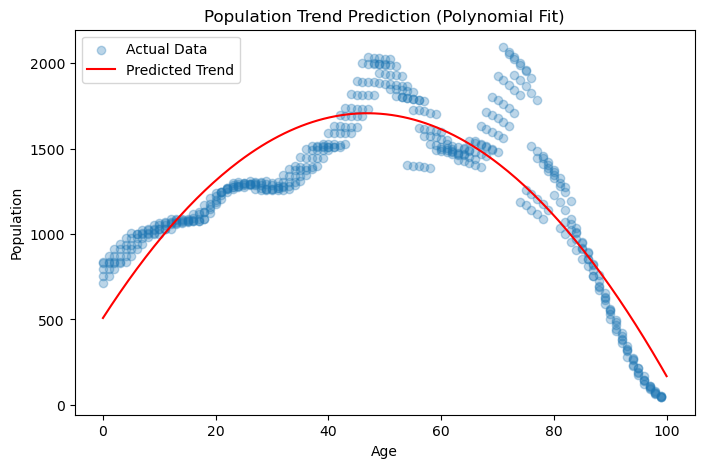

In [73]:
import numpy as np

# 年龄作为x
x = df["age"].values

# 人口作为y
y = df["total_population"].values

# 拟合2次多项式（简单预测模型）
coeff = np.polyfit(x, y, 2)

# 构建模型
model = np.poly1d(coeff)

# 预测曲线
x_pred = np.linspace(0, 100, 200)
y_pred = model(x_pred)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.scatter(x, y, alpha=0.3, label="Actual Data")
plt.plot(x_pred, y_pred, color="red", label="Predicted Trend")

plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Population Trend Prediction (Polynomial Fit)")
plt.legend()

plt.show()


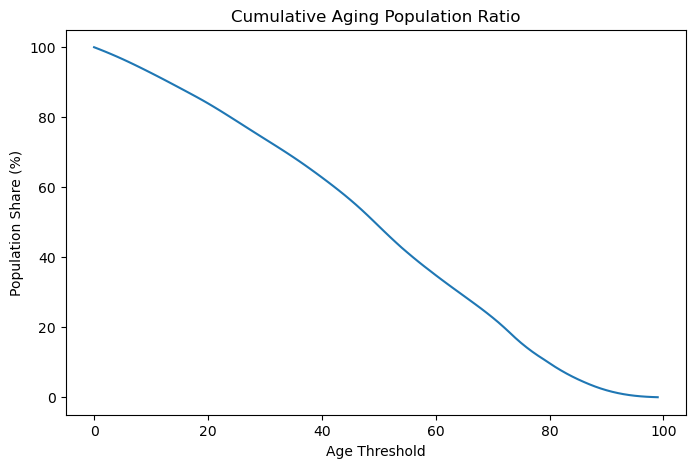

In [74]:
# ===== 老龄人口占比随年龄累计变化 =====

ages = np.sort(df["age"].unique())

aging_curve = []

for a in ages:
    older_pop = df[df["age"] >= a]["total_population"].sum()
    total_pop = df["total_population"].sum()
    aging_curve.append(older_pop / total_pop * 100)

plt.figure(figsize=(8,5))
plt.plot(ages, aging_curve)

plt.xlabel("Age Threshold")
plt.ylabel("Population Share (%)")
plt.title("Cumulative Aging Population Ratio")
plt.show()


## Machine Learning Prediction

Slope (coef): [-2.85862826]
Intercept: 1390.158099009901


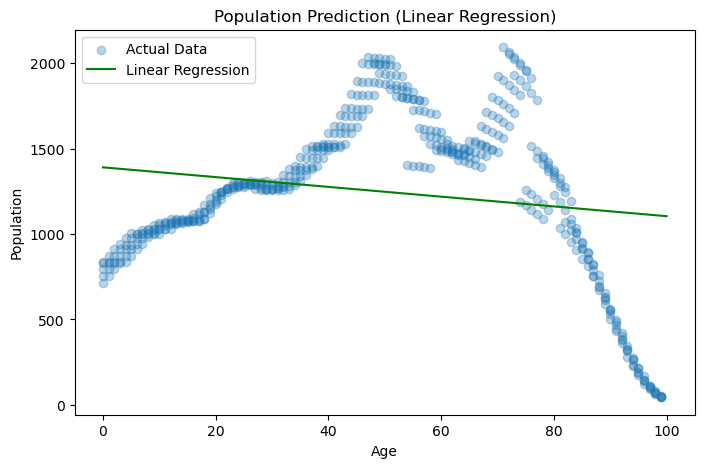

In [75]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# ===== 1️⃣ 准备数据 =====

# sklearn要求二维输入
X = df["age"].values.reshape(-1, 1)
y = df["total_population"].values

# ===== 2️⃣ 创建模型 =====

model = LinearRegression()

# ===== 3️⃣ 训练模型 =====

model.fit(X, y)

print("Slope (coef):", model.coef_)
print("Intercept:", model.intercept_)

# ===== 4️⃣ 预测 =====

X_pred = np.linspace(0, 100, 200).reshape(-1, 1)
y_pred = model.predict(X_pred)

# ===== 5️⃣ 可视化 =====

plt.figure(figsize=(8,5))

plt.scatter(X, y, alpha=0.3, label="Actual Data")
plt.plot(X_pred, y_pred, color="green", label="Linear Regression")

plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Population Prediction (Linear Regression)")
plt.legend()

plt.show()



In [76]:
from sklearn.metrics import r2_score

# 用模型预测训练数据
y_pred_train = model.predict(X)

# 计算R²
r2 = r2_score(y, y_pred_train)

print("R² Score:", r2)


R² Score: 0.031182306510850077


In [77]:
from sklearn.metrics import r2_score
import numpy as np

# linear model R2
y_pred_linear = model.predict(X)

# polynomial model R2（重新生成，避免冲突）
coeff = np.polyfit(df["age"].values, df["total_population"].values, 2)
poly_model = np.poly1d(coeff)

y_pred_poly = poly_model(df["age"].values)

print("Linear R²:", r2_score(y, y_pred_linear))
print("Polynomial R²:", r2_score(y, y_pred_poly))


Linear R²: 0.031182306510850077
Polynomial R²: 0.7870170214811939


In [78]:
from sklearn.model_selection import train_test_split

# sklearn需要二维输入
X = df["age"].values.reshape(-1, 1)
y = df["total_population"].values

# 80%训练 20%测试
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (400, 1)
Test size: (100, 1)


In [79]:
from sklearn.metrics import r2_score

# test预测
y_pred_test = model.predict(X_test)

# test R2
r2 = r2_score(y_test, y_pred_test)

print("Test R2:", r2)


Test R2: -0.0011496418478869064


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

print("MAE:", mae)
print("MSE:", mse)


MAE: 394.5155974077409
MSE: 225909.83105881244


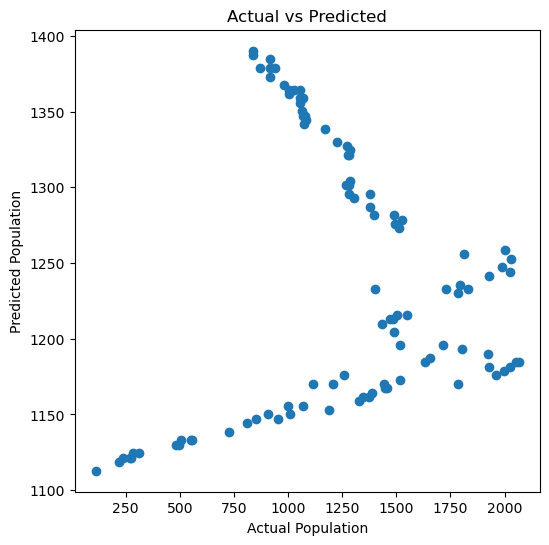

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs Predicted")
plt.show()


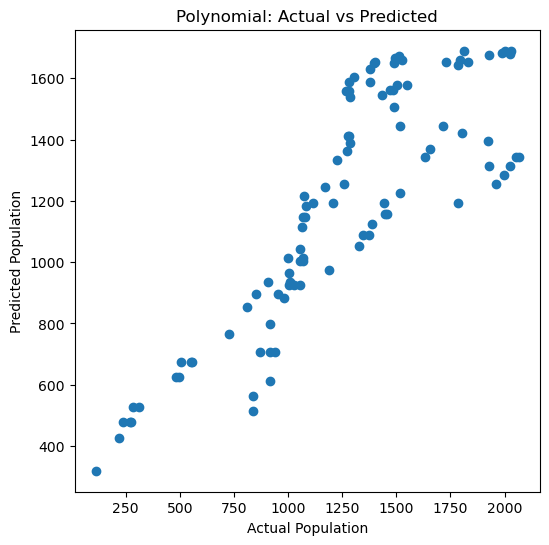

In [82]:
# polynomial test预测
coeff = np.polyfit(X_train.flatten(), y_train, 2)
poly_model = np.poly1d(coeff)

y_pred_poly_test = poly_model(X_test.flatten())

# 画图
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly_test)
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Polynomial: Actual vs Predicted")
plt.show()


In [83]:
print("Linear Test R2:", r2_score(y_test, y_pred_test))
print("Polynomial Test R2:", r2_score(y_test, y_pred_poly_test))



Linear Test R2: -0.0011496418478869064
Polynomial Test R2: 0.6900753755057232
